In [27]:
import os
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [47]:
tf_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    width_shift_range=0.0,
    height_shift_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale= 1/255

)

train_gen = tf_generator.flow_from_directory(

    os.getcwd()+"/skin_cancer/train",
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    

)

test_gen = tf_generator.flow_from_directory(
    os.getcwd()+"/skin_cancer/test",
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)


Found 2967 images belonging to 3 classes.
Found 330 images belonging to 3 classes.


32
[0. 1. 0.]
(224, 224, 3)


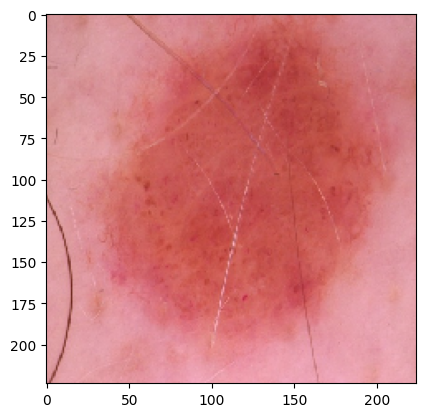

In [48]:
### test Generator
import matplotlib.pyplot as plt
import numpy as np
test_img = None
test_label = None
for image,label in test_gen:
    print(len(image))
    test_img = image[0]
    test_label = label[0]
    break
print(test_label)
print(test_img.shape)
plt.imshow(test_img)
plt.show()

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam,RMSprop

input_shape = (224,224,3)
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape= input_shape),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation= 'relu'),
    Dense(3, activation='sigmoid')
    
])

/Users/tharhtet/.local/share/virtualenvs/tensorflow_serveing-WFWV-CRM/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.summary()
#tf.keras.utils.plot_model(model,show_shapes=True)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,756,195 (98.25 MB)

 Trainable params: 25,756,195 (98.25 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
import datetime

batch_size =  32
epochs  = 20


base_learning_rate = 1e-3 #0.0001
optimizer = Adam(learning_rate=base_learning_rate, decay=1e-4)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [87]:
num_train = len(train_gen.filenames)
num_test = len(test_gen.filenames)
steps_per_epoch=int(num_train / batch_size)
print("Number of train : ",num_train)
print(num_test/batch_size)
print(steps_per_epoch)

Number of train :  2967
10.3125
92


In [88]:
history = model.fit(train_gen, steps_per_epoch=steps_per_epoch, epochs=epochs,
                            validation_data=test_gen,
                            validation_steps=int(num_test / batch_size), callbacks=[ tensorboard_callback])

Epoch 1/20


2024-07-31 00:46:58.441208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/tharhtet/.local/share/virtualenvs/tensorflow_serveing-WFWV-CRM/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 212ms/step - accuracy: 0.5694 - loss: 2.0652 - val_accuracy: 0.7406 - val_loss: 0.5830
Epoch 2/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 25s 281ms/step - accuracy: 0.7188 - loss: 0.5999

2024-07-31 00:47:20.319536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:47:20.319559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/Shape/_34]]
2024-07-31 00:47:20.319572: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4922225735713169499
2024-07-31 00:47:20.319577: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12015285205841641765
2024-07-31 00:47:20.319580: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17404455100373013949
2024-07-31 00:47:20.319584: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14177290122202

92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.7188 - loss: 0.5999 - val_accuracy: 0.8000 - val_loss: 0.5178
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - accuracy: 0.7077 - loss: 0.6735 - val_accuracy: 0.7063 - val_loss: 0.6206
Epoch 4/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.6875 - loss: 0.5779

2024-07-31 00:47:43.724242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:47:43.724268: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8705253843366481990
2024-07-31 00:47:43.724275: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16456677823549063048
2024-07-31 00:47:43.724279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_12/_58]]
2024-07-31 00:47:43.724291: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4922225735713169499
2024-07-31 00:47:43.724296: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 120152852

92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6875 - loss: 0.5779 - val_accuracy: 0.7000 - val_loss: 0.8364
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.7641 - loss: 0.5530 - val_accuracy: 0.6562 - val_loss: 0.7447
Epoch 6/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 26s 292ms/step - accuracy: 0.7500 - loss: 0.4630

2024-07-31 00:48:06.397482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:48:06.397516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_6/_52]]
2024-07-31 00:48:06.397524: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4922225735713169499
2024-07-31 00:48:06.397528: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12015285205841641765
2024-07-31 00:48:06.397531: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16945949791325631613
2024-07-31 00:48:06.397535: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 141772901

92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7500 - loss: 0.4630 - val_accuracy: 0.3000 - val_loss: 1.2877
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.7759 - loss: 0.5196 - val_accuracy: 0.6906 - val_loss: 0.6057
Epoch 8/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 25s 278ms/step - accuracy: 0.6562 - loss: 0.6270

2024-07-31 00:48:28.611603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:48:28.611627: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16456677823549063048
2024-07-31 00:48:28.611631: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12790298216332972910
2024-07-31 00:48:28.611635: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10489668495234547642
2024-07-31 00:48:28.611639: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4922225735713169499
2024-07-31 00:48:28.611642: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12015285205841641765
2024-07-31 00:48:28.611645: I tensorflow/core/framework/local_rende

92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6562 - loss: 0.6270 - val_accuracy: 0.7000 - val_loss: 0.4932
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.7788 - loss: 0.5141 - val_accuracy: 0.7656 - val_loss: 0.5454
Epoch 10/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 26s 295ms/step - accuracy: 0.9062 - loss: 0.3267

2024-07-31 00:48:50.872972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:48:50.872997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_60]]
2024-07-31 00:48:50.873014: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8705253843366481990
2024-07-31 00:48:50.873028: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4801744883451982584
2024-07-31 00:48:50.873035: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4922225735713169499
2024-07-31 00:48:50.873050: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1201528520

92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9062 - loss: 0.3267 - val_accuracy: 0.8000 - val_loss: 0.4970
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.7816 - loss: 0.4879 - val_accuracy: 0.7312 - val_loss: 0.5515
Epoch 12/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 27s 298ms/step - accuracy: 0.7188 - loss: 0.5640

2024-07-31 00:49:14.141420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:49:14.141460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/Shape/_34]]
2024-07-31 00:49:14.141474: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4922225735713169499
2024-07-31 00:49:14.141480: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8705253843366481990
2024-07-31 00:49:14.141492: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10489668495234547642
2024-07-31 00:49:14.141497: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 120152852058416

92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7188 - loss: 0.5640 - val_accuracy: 0.7000 - val_loss: 0.8421
Epoch 13/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 190ms/step - accuracy: 0.7861 - loss: 0.4970 - val_accuracy: 0.6375 - val_loss: 0.7582
Epoch 14/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 26s 290ms/step - accuracy: 0.7188 - loss: 0.5786

2024-07-31 00:49:36.429521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:49:36.429550: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16456677823549063048
2024-07-31 00:49:36.429565: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8705253843366481990
2024-07-31 00:49:36.429571: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12790298216332972910
2024-07-31 00:49:36.429575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_12/_58]]
2024-07-31 00:49:36.429587: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10489668

92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7188 - loss: 0.5786 - val_accuracy: 0.7000 - val_loss: 0.5802
Epoch 15/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 0.7775 - loss: 0.5054 - val_accuracy: 0.7094 - val_loss: 0.6365
Epoch 16/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 25s 281ms/step - accuracy: 0.7812 - loss: 0.4989

2024-07-31 00:49:59.329709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:49:59.329737: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8705253843366481990
2024-07-31 00:49:59.329744: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4801744883451982584
2024-07-31 00:49:59.329748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_60]]
2024-07-31 00:49:59.329764: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4922225735713169499
2024-07-31 00:49:59.329771: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1201528520

92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7812 - loss: 0.4989 - val_accuracy: 0.5000 - val_loss: 0.8190
Epoch 17/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - accuracy: 0.8087 - loss: 0.4530 - val_accuracy: 0.7312 - val_loss: 0.6119
Epoch 18/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 26s 295ms/step - accuracy: 0.8750 - loss: 0.3041

2024-07-31 00:50:21.512504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:50:21.512543: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8705253843366481990
2024-07-31 00:50:21.512547: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12790298216332972910
2024-07-31 00:50:21.512568: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16456677823549063048
2024-07-31 00:50:21.512573: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4922225735713169499
2024-07-31 00:50:21.512576: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12015285205841641765
2024-07-31 00:50:21.512579: I tensorflow/core/framework/local_rendez

92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8750 - loss: 0.3041 - val_accuracy: 0.7000 - val_loss: 0.6136
Epoch 19/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - accuracy: 0.8116 - loss: 0.4657 - val_accuracy: 0.7344 - val_loss: 0.6220
Epoch 20/20
 1/92 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.8750 - loss: 0.4046

2024-07-31 00:50:44.341579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 00:50:44.341606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_68]]
2024-07-31 00:50:44.341620: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16456677823549063048
2024-07-31 00:50:44.341627: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4922225735713169499
2024-07-31 00:50:44.341640: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12015285205841641765
2024-07-31 00:50:44.341646: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8118541420687778426
2024-07-

92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8750 - loss: 0.4046 - val_accuracy: 0.5000 - val_loss: 0.9260


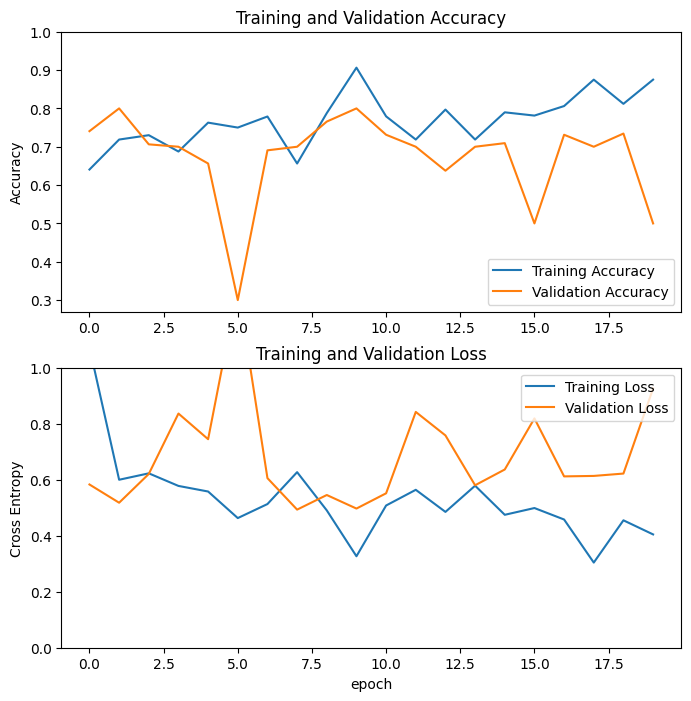

In [89]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()